# Review Konsep Variansi (Variance)

Pada notebook ini, kita akan membahas konsep variansi yang merupakan ukuran penyebaran data yang sangat penting dalam statistika dan machine learning.

## Apa itu Variansi?

Variansi adalah ukuran seberapa jauh sebuah kumpulan bilangan tersebar dari nilai rata-ratanya (expected value). Variansi didefinisikan sebagai nilai harapan dari kuadrat deviasi dari mean:

\[ Var(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2 \]

## Notasi dan Terminologi

- Variansi populasi: σ² (sigma kuadrat)
- Variansi sampel: s²
- Standar deviasi: σ atau s (akar kuadrat dari variansi)
- Kovariansi: Cov(X,Y) = E[(X - E[X])(Y - E[Y])]

## Pentingnya Variansi dalam Machine Learning

Variansi digunakan dalam:
1. Evaluasi model (bias-variance tradeoff)
2. Feature scaling dan normalisasi
3. Principal Component Analysis (PCA)
4. Regularisasi
5. Interval kepercayaan

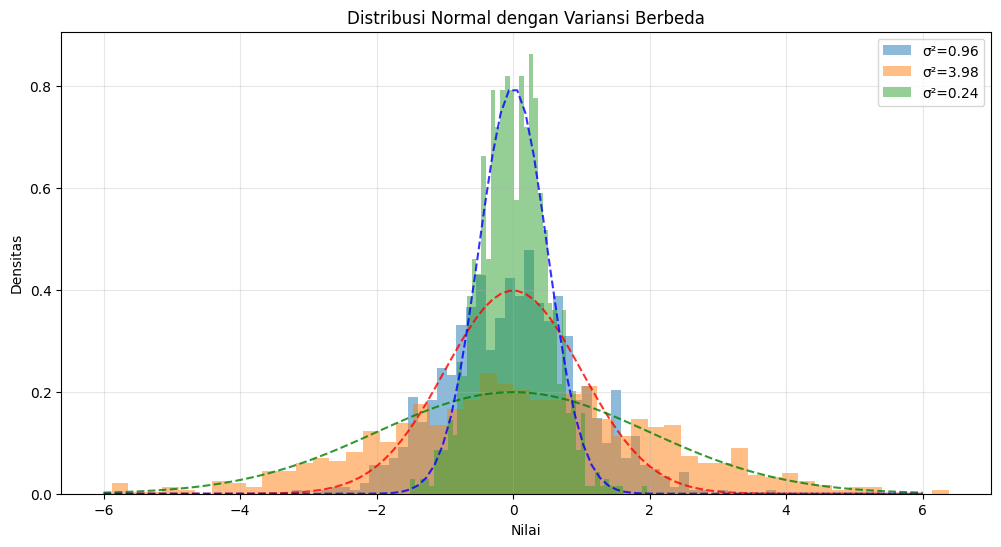

Variansi empiris:
Data 1 (σ=1): 0.9579
Data 2 (σ=2): 3.9757
Data 3 (σ=0.5): 0.2416


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate data from different distributions
n_samples = 1000
data1 = np.random.normal(loc=0, scale=1, size=n_samples)  # Normal dist with σ=1
data2 = np.random.normal(loc=0, scale=2, size=n_samples)  # Normal dist with σ=2
data3 = np.random.normal(loc=0, scale=0.5, size=n_samples)  # Normal dist with σ=0.5

# Calculate variances
var1 = np.var(data1)
var2 = np.var(data2)
var3 = np.var(data3)

# Plot distributions
plt.figure(figsize=(12, 6))
plt.hist(data1, bins=50, alpha=0.5, label=f'σ²={var1:.2f}', density=True)
plt.hist(data2, bins=50, alpha=0.5, label=f'σ²={var2:.2f}', density=True)
plt.hist(data3, bins=50, alpha=0.5, label=f'σ²={var3:.2f}', density=True)

# Add theoretical curves
x = np.linspace(-6, 6, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r--', alpha=0.8)
plt.plot(x, stats.norm.pdf(x, 0, 2), 'g--', alpha=0.8)
plt.plot(x, stats.norm.pdf(x, 0, 0.5), 'b--', alpha=0.8)

plt.title('Distribusi Normal dengan Variansi Berbeda')
plt.xlabel('Nilai')
plt.ylabel('Densitas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Variansi empiris:")
print(f"Data 1 (σ=1): {var1:.4f}")
print(f"Data 2 (σ=2): {var2:.4f}")
print(f"Data 3 (σ=0.5): {var3:.4f}")

## Sifat-sifat Variansi

1. **Non-negativitas**: 
   - Var(X) ≥ 0
   - Var(X) = 0 jika dan hanya jika X adalah konstanta

2. **Homogenitas**: 
   - Var(aX) = a²Var(X)

3. **Variansi Jumlahan**:
   - Var(X + Y) = Var(X) + Var(Y) + 2Cov(X,Y)
   - Jika X dan Y independen: Var(X + Y) = Var(X) + Var(Y)

4. **Variansi dan Transformasi Linear**:
   - Var(aX + b) = a²Var(X)

Mari kita verifikasi beberapa sifat ini:

Verifikasi Homogenitas:
Var(aX) = 20.3711
a²Var(X) = 20.3711
Perbedaan: 0.0000

Verifikasi Variansi Jumlahan:
Var(X + Y) = 6.3218
Var(X) + Var(Y) = 6.3073
Covariance: 0.0073
Var(X + Y) - (Var(X) + Var(Y)) = 0.0146


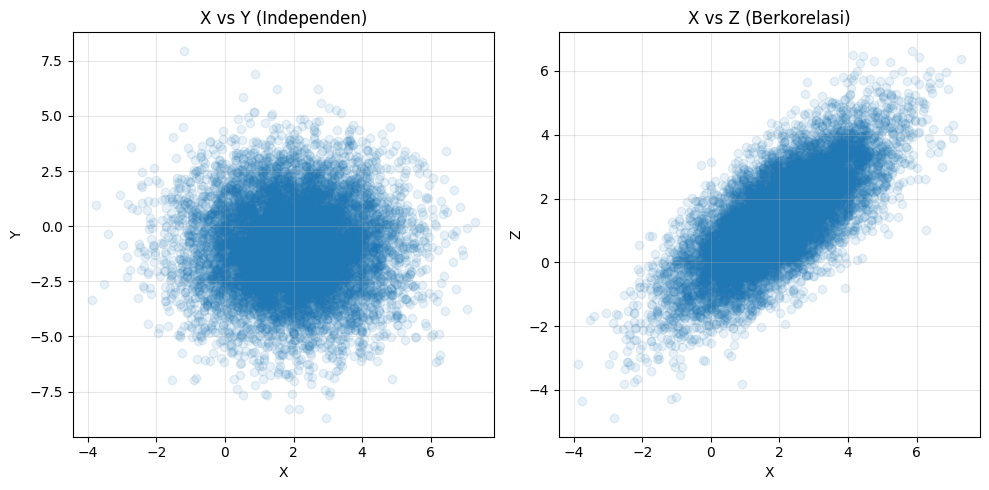


Korelasi X,Y: 0.0024
Korelasi X,Z: 0.7353


In [34]:
# Generate random variables
X = np.random.normal(loc=2, scale=1.5, size=10000)
Y = np.random.normal(loc=-1, scale=2, size=10000)

# Verifikasi homogenitas
a = 3
var_aX = np.var(a * X)
a2_varX = a**2 * np.var(X)

print("Verifikasi Homogenitas:")
print(f"Var(aX) = {var_aX:.4f}")
print(f"a²Var(X) = {a2_varX:.4f}")
print(f"Perbedaan: {abs(var_aX - a2_varX):.4f}\n")

# Verifikasi variansi jumlahan untuk variabel independen
var_sum = np.var(X + Y)
sum_var = np.var(X) + np.var(Y)
covariance = np.cov(X, Y)[0,1]

print("Verifikasi Variansi Jumlahan:")
print(f"Var(X + Y) = {var_sum:.4f}")
print(f"Var(X) + Var(Y) = {sum_var:.4f}")
print(f"Covariance: {covariance:.4f}")
print(f"Var(X + Y) - (Var(X) + Var(Y)) = {var_sum - sum_var:.4f}")

# Visualisasi korelasi
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(X, Y, alpha=0.1)
plt.title('X vs Y (Independen)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)

# Membuat variabel yang berkorelasi
Z = 0.7 * X + np.random.normal(0, 1, size=10000)
plt.subplot(122)
plt.scatter(X, Z, alpha=0.1)
plt.title('X vs Z (Berkorelasi)')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hitung korelasi
corr_XY = np.corrcoef(X, Y)[0,1]
corr_XZ = np.corrcoef(X, Z)[0,1]
print(f"\nKorelasi X,Y: {corr_XY:.4f}")
print(f"Korelasi X,Z: {corr_XZ:.4f}")

## Variansi dalam Machine Learning

### 1. Bias-Variance Tradeoff

Dalam machine learning, error total model dapat didekomposisi menjadi tiga komponen:
- Bias²
- Variance
- Irreducible Error

\[ E[(y - \hat{f}(x))^2] = Bias[\hat{f}(x)]^2 + Var[\hat{f}(x)] + \sigma^2 \]

Mari kita visualisasikan konsep ini dengan contoh regresi polinomial:

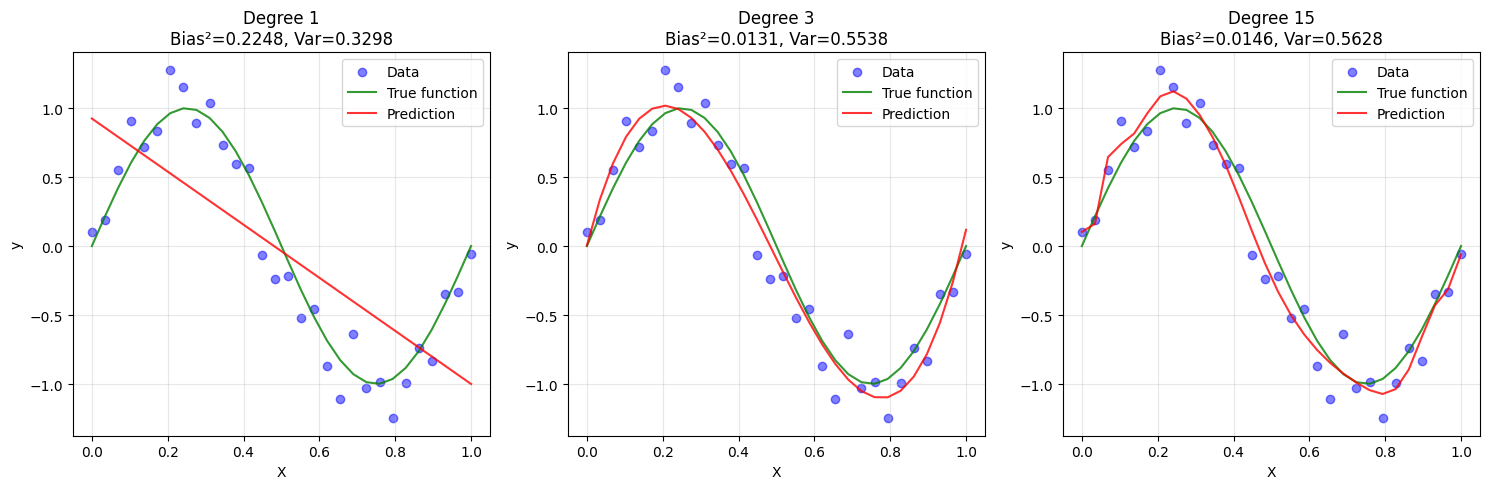

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate data
np.random.seed(42)
X = np.linspace(0, 1, 30).reshape(-1, 1)
y_true = np.sin(2 * np.pi * X)
y = y_true + np.random.normal(0, 0.2, size=X.shape)

# Fit models with different complexities
degrees = [1, 3, 15]  # Linear, Cubic, and High-degree polynomial
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, i)
    
    # Fit model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate variance of predictions
    pred_var = np.var(y_pred)
    bias = np.mean((y_true - y_pred) ** 2)
    
    # Plot
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
    plt.plot(X, y_true, 'g-', label='True function', alpha=0.8)
    plt.plot(X, y_pred, 'r-', label='Prediction', alpha=0.8)
    plt.title(f'Degree {degree}\nBias²={bias:.4f}, Var={pred_var:.4f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2. Feature Scaling dan Standardisasi

Standardisasi adalah proses transformasi fitur sehingga memiliki mean 0 dan variansi 1:

\[ z = \frac{x - \mu}{\sigma} \]

Ini penting dalam banyak algoritma machine learning untuk:
- Menyamakan skala fitur
- Mempercepat konvergensi
- Meningkatkan stabilitas numerik

Mari kita lihat contoh standardisasi:

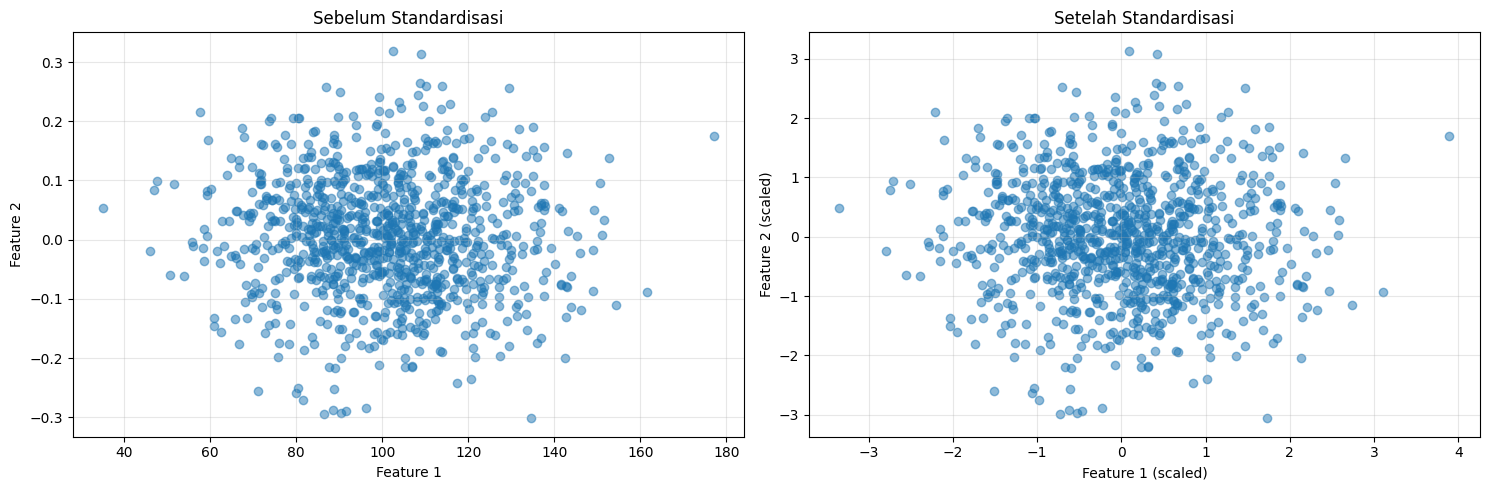

Sebelum standardisasi:
Mean feature 1: 100.7527, Variance: 383.6545
Mean feature 2: 0.0049, Variance: 0.0101

Setelah standardisasi:
Mean feature 1: -0.0000, Variance: 1.0000
Mean feature 2: -0.0000, Variance: 1.0000


In [39]:
from sklearn.preprocessing import StandardScaler

# Generate data dengan skala berbeda
n_samples = 1000
feature1 = np.random.normal(100, 20, n_samples)  # Mean=100, STD=20
feature2 = np.random.normal(0, 0.1, n_samples)   # Mean=0, STD=0.1

# Combine features
X = np.column_stack([feature1, feature2])

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot before and after standardization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before standardization
ax1.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax1.set_title('Sebelum Standardisasi')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, alpha=0.3)

# After standardization
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
ax2.set_title('Setelah Standardisasi')
ax2.set_xlabel('Feature 1 (scaled)')
ax2.set_ylabel('Feature 2 (scaled)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Sebelum standardisasi:")
print(f"Mean feature 1: {np.mean(X[:, 0]):.4f}, Variance: {np.var(X[:, 0]):.4f}")
print(f"Mean feature 2: {np.mean(X[:, 1]):.4f}, Variance: {np.var(X[:, 1]):.4f}")
print("\nSetelah standardisasi:")
print(f"Mean feature 1: {np.mean(X_scaled[:, 0]):.4f}, Variance: {np.var(X_scaled[:, 0]):.4f}")
print(f"Mean feature 2: {np.mean(X_scaled[:, 1]):.4f}, Variance: {np.var(X_scaled[:, 1]):.4f}")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar variansi dan standar deviasi
2. Sifat-sifat penting variansi
3. Aplikasi variansi dalam machine learning:
   - Bias-variance tradeoff
   - Feature scaling dan standardisasi
   - Evaluasi model

Variansi adalah konsep fundamental yang digunakan dalam:
- Pemahaman distribusi data
- Preprocessing data
- Evaluasi dan optimisasi model
- Analisis ketidakpastian

## Latihan

1. Hitung dan bandingkan variansi dari beberapa distribusi probabilitas yang berbeda (normal, uniform, exponential)
2. Implementasikan standardisasi data tanpa menggunakan StandardScaler
3. Visualisasikan bias-variance tradeoff untuk model regresi dengan kompleksitas yang berbeda
4. Analisis pengaruh outlier terhadap mean dan variansi

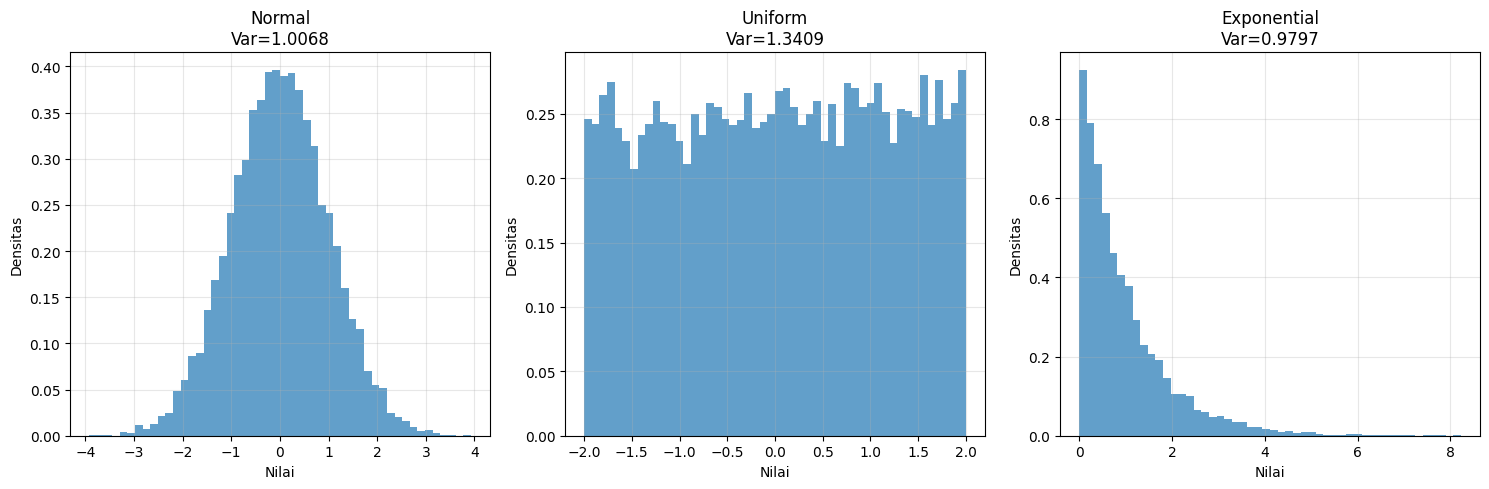

Statistik distribusi:

Normal:
Mean: -0.0021
Variance: 1.0068
Std Dev: 1.0034

Uniform:
Mean: 0.0285
Variance: 1.3409
Std Dev: 1.1580

Exponential:
Mean: 0.9868
Variance: 0.9797
Std Dev: 0.9898


In [41]:
# Latihan 1: Perbandingan variansi berbagai distribusi
n_samples = 10000

# Generate data dari berbagai distribusi
normal_data = np.random.normal(0, 1, n_samples)
uniform_data = np.random.uniform(-2, 2, n_samples)
exponential_data = np.random.exponential(1, n_samples)

# Hitung statistik
distributions = {
    'Normal': normal_data,
    'Uniform': uniform_data,
    'Exponential': exponential_data
}

# Plot distributions
plt.figure(figsize=(15, 5))
for i, (name, data) in enumerate(distributions.items(), 1):
    plt.subplot(1, 3, i)
    plt.hist(data, bins=50, density=True, alpha=0.7)
    plt.title(f'{name}\nVar={np.var(data):.4f}')
    plt.xlabel('Nilai')
    plt.ylabel('Densitas')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Statistik distribusi:")
for name, data in distributions.items():
    print(f"\n{name}:")
    print(f"Mean: {np.mean(data):.4f}")
    print(f"Variance: {np.var(data):.4f}")
    print(f"Std Dev: {np.std(data):.4f}")